# Problem statement:

Sales prediction for Bigmart

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train.dtypes)
print()
print(test.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Categorical Features:

Item_Identifier,
Item_Fat_Content,
Item_Type,
Outlet_Identifier,
Outlet_Size,
Outlet_Location_Type,
Outlet_Type

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [10]:
# filling the missing values in "Item_weight column" with "Mean" value
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [11]:
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace=True)

In [12]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# filling the missing values in "Item_weight column" with "Mean" value
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [14]:
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0],inplace=True)

In [15]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Analysis

In [16]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [17]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

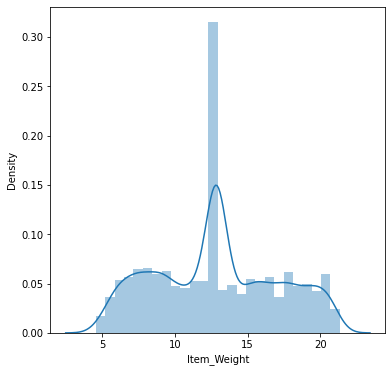

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

We have more products of weight around 12.5.

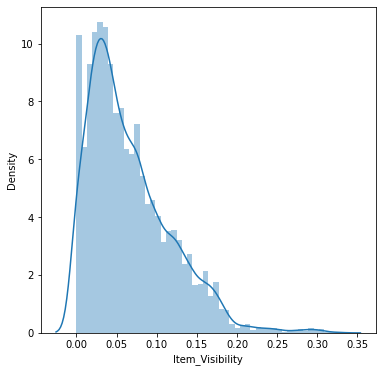

In [19]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

We have Items having Visibility 0 to 0.2 is more.

And Items having Visibility around 0.05 is maximum.

Positive skewness

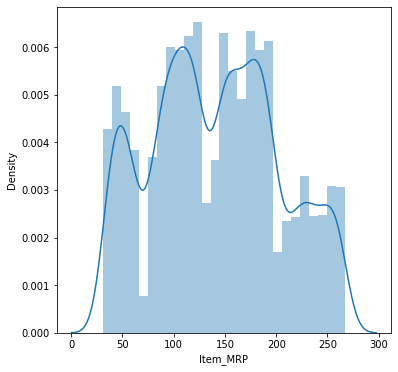

In [20]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

We have good amount of products for 50 MRP, 100 MRP ,180 MRP



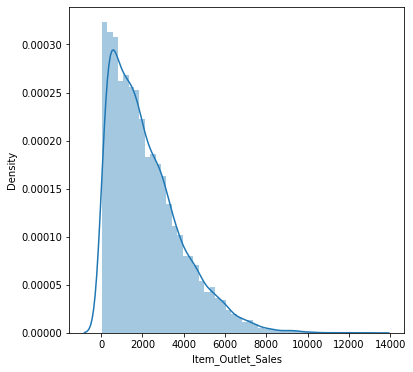

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

2000 is the highest sales

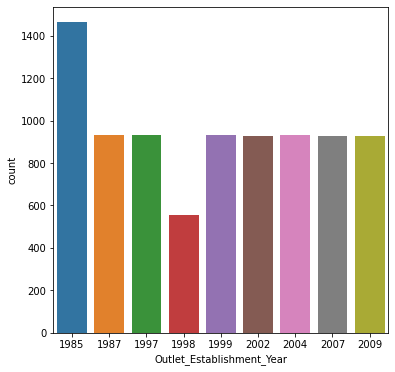

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()



We also have a outlet which was established 1985 years has the highest outlet count.

# Categorical Features

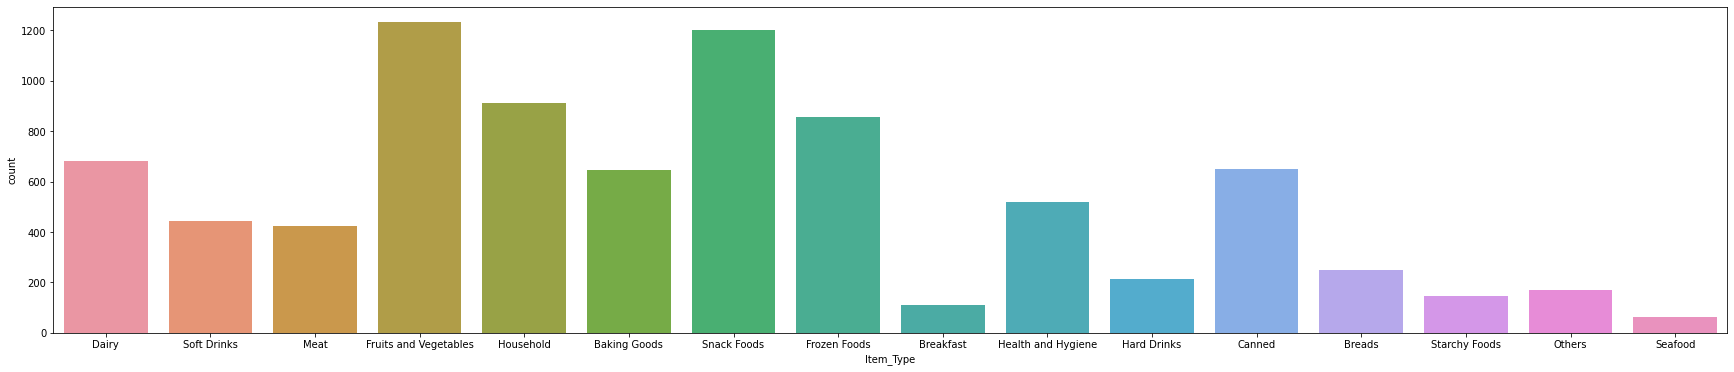

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

More amount of products available were Fruits-Veggies and Snack Foods 

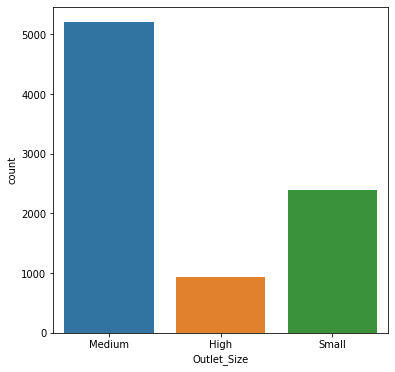

In [25]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train)
plt.show()

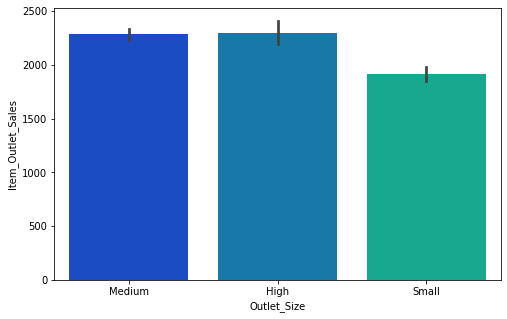

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')
plt.show()

The Outlets are more of Medium Size

But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

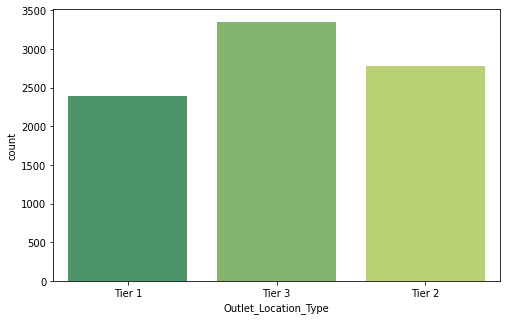

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=train,palette='summer')
plt.show()

But we have only Tier3 locations maximum Outlets

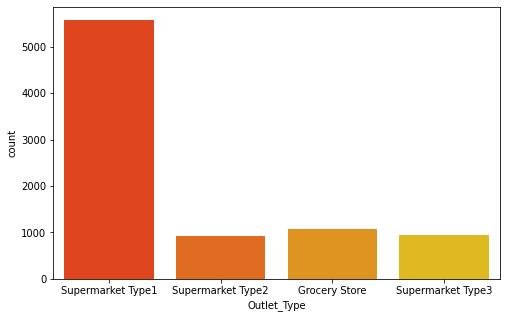

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train,palette='autumn')
plt.show()

The Outlets are more of Supermarket Type1.

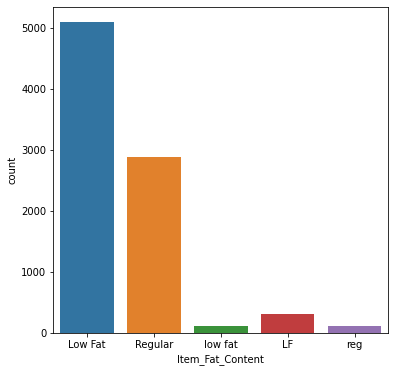

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

The Items bought are more of Low Fat.



# Data Pre-Processing

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [32]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

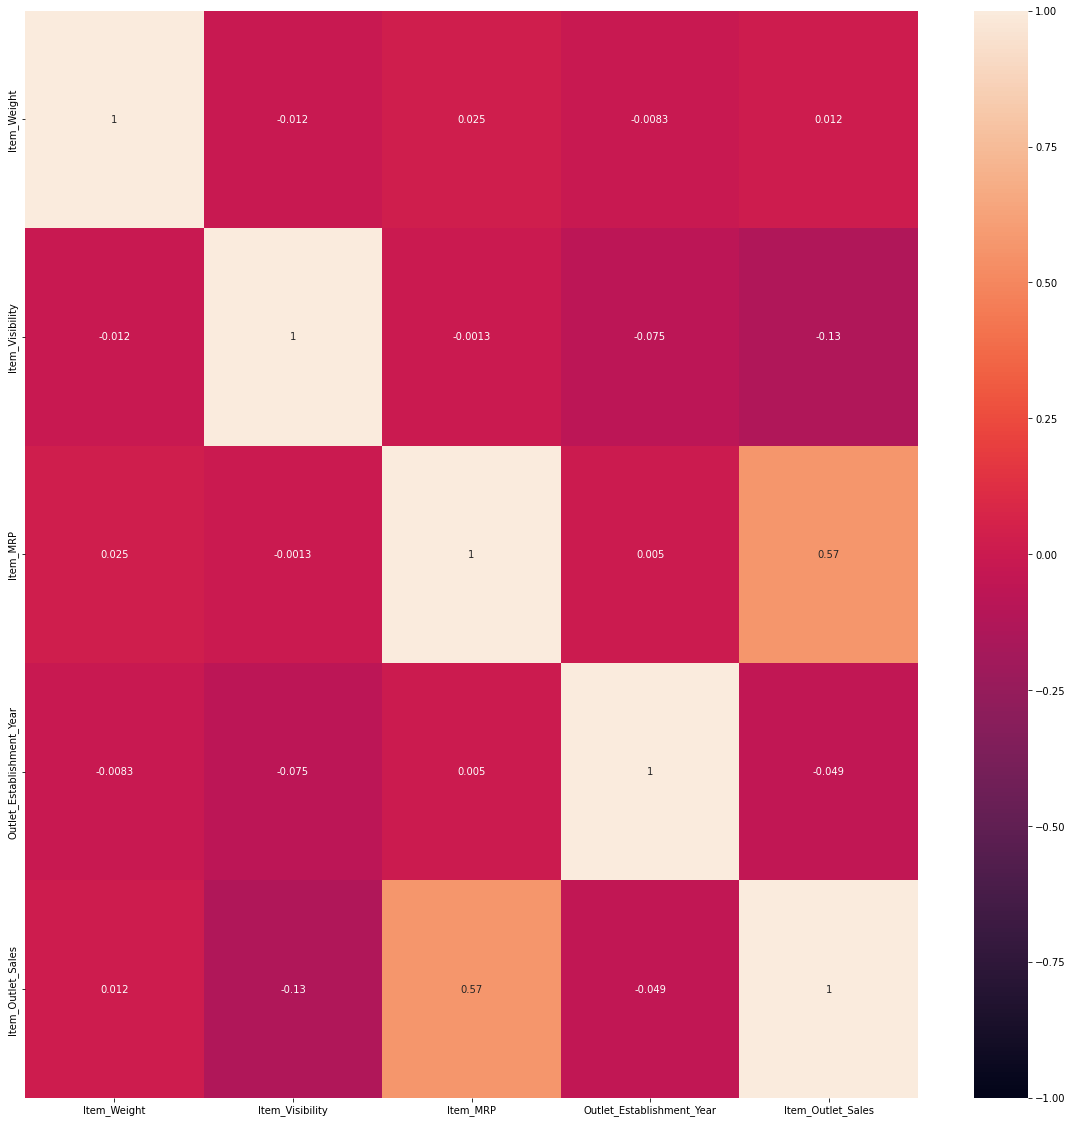

In [33]:
#assumption of no multicollinearity:there should be no multicollinearity between the independent variable
#there is no extreme corealtion betwn ind viarable
corr_df=X.corr(method="pearson")
corr_df=train.corr()
#print(corr_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.

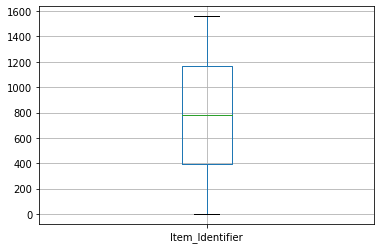

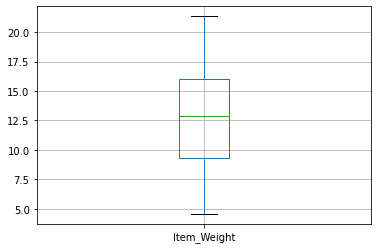

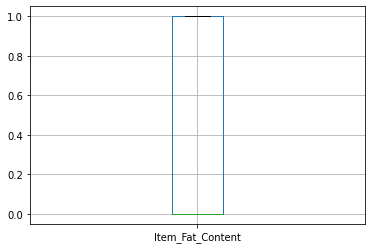

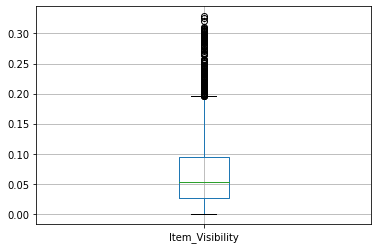

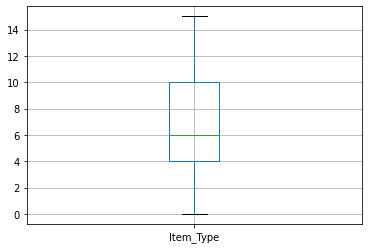

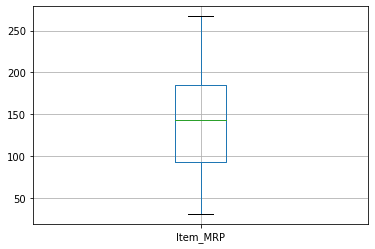

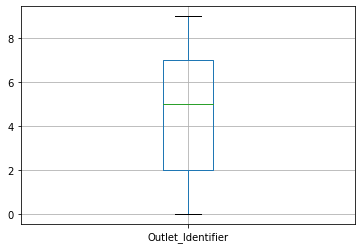

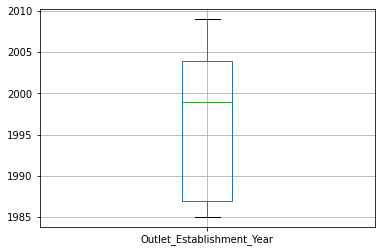

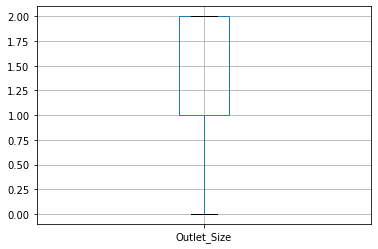

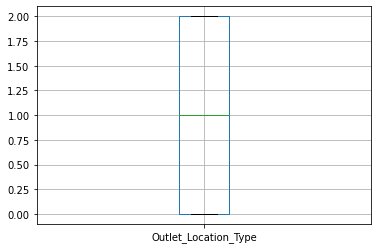

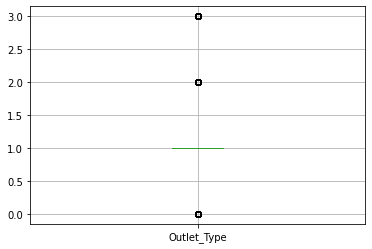

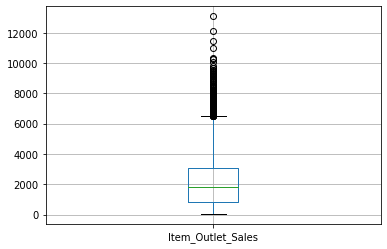

In [72]:
#Assumption :there should be no outliers in the data.
#Check using boxplot.
#newpaper has outliers deal with outliers or keep it as it is considering them as real values
for i in train.columns:
    train.boxplot(column=i)
    plt.show()

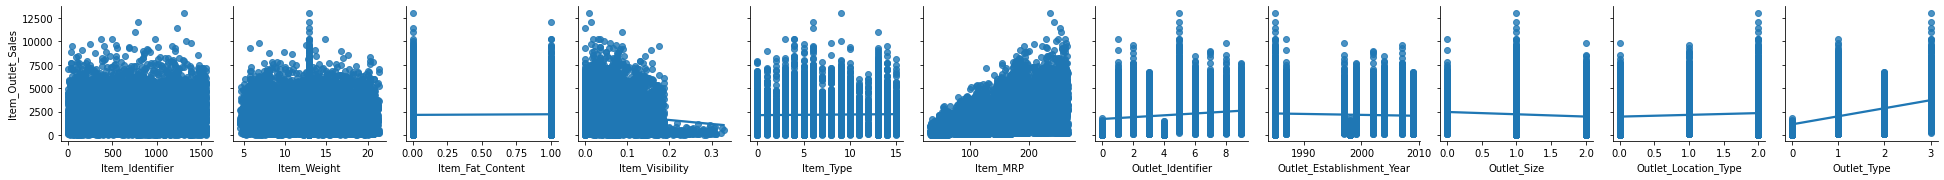

In [80]:
#Assumption :Assumption of Linearity:Every ind var should have a linear realtionship with the dep var
#tv as strong postive linearity,radio have moderate linearity,newspaper has now relationship of linearity 
#so hence we can remove newpaper during feature selection. 
sns.pairplot(train,x_vars=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
            y_vars='Item_Outlet_Sales',kind='reg')

In [78]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Label Encoding

In [34]:
colname=[]
for x in train.columns:
    if train[x].dtypes=='object':
        colname.append(x)
        
colname

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    train[x]=le.fit_transform(train[x])

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [37]:
colname=[]
for x in test.columns:
    if test[x].dtypes=='object':
        colname.append(x)
        
colname

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    test[x]=le.fit_transform(test[x])

In [39]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


# Splitting features and Target

In [40]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
#scaler.fit_transform(X_train)
scaler.fit(X)
X=scaler.transform(X)

#while working on separate train and test data, fit the scaler object only upon the train data 
#and use the same scaler object to transform both the train as well as the test data.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

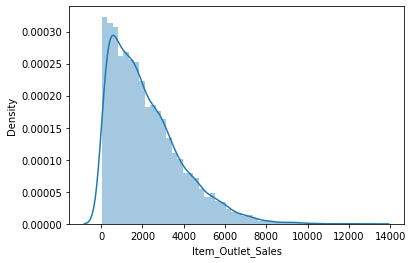

In [42]:
#Assumption of Normality:The dpendent variable should follow an approxiamte normal distribution
#Approx normal distribution
sns.distplot(Y)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

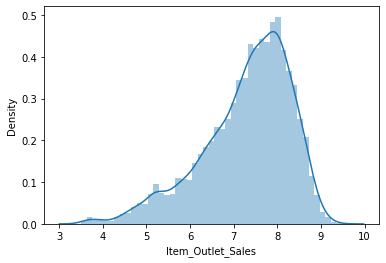

In [43]:
Y_log=np.log(Y)
sns.distplot(Y_log,hist=True)

# Splitting the data into Training data & Testing Data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.3, random_state=10)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(Y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(Y_test.shape))

x train data (5966, 11)
y train data (5966,)
x test data  (2557, 11)
y test data  (2557,)


# Machine Learning Model Training

LinearRegression:
Accuracy-58.79%

In [45]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept n coefficients
print(lm.intercept_)
print(lm.coef_)

7.299740308178678
[-0.00351504  0.00160131  0.01009729 -0.06955049  0.00132702  0.525036
  0.19312621  0.15715698 -0.27050075 -0.18283724  0.50655092]


In [46]:

#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[8.32614007 6.92168122 7.93099664 ... 6.34014727 5.25045193 7.68306898]


In [47]:
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.5962591326345533

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5879586706534069
RMSE: 0.6528411020105132
Adj R-square: 0.5874261298682097


In [49]:
from sklearn.linear_model import Ridge
#create a model object
lm=Ridge()
#train the model object
lm.fit(X_train,Y_train)
#print intercept n coefficients
print(lm.intercept_)
print(lm.coef_)

7.2997405325093325
[-0.00351386  0.00160354  0.01009872 -0.06956934  0.00132865  0.52494401
  0.1933115   0.15708994 -0.27036273 -0.18247516  0.50629453]


In [50]:
Y_pred=lm.predict(X_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5879600410928506
RMSE: 0.6528400163427938
Adj R-square: 0.5874275020788713


In [52]:
from sklearn.linear_model import Lasso
#create a model object
lm=Lasso()
#train the model object
lm.fit(X_train,Y_train)
#print intercept n coefficients
print(lm.intercept_)
print(lm.coef_)

7.293671230659148
[-0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.]


In [53]:
Y_pred=lm.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -8.841310760643317e-05
RMSE: 1.0170827700981302
Adj R-square: -0.0013809724477760188


DecisionTreeRegressor:Accuracy-72%

In [55]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(
                                         random_state=10,
                                         min_samples_leaf=10,
                                         min_samples_split=5,
                                         max_depth=6)


model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7200168134975543
RMSE: 0.5381496663704141
Adj R-square: 0.7196549506081726


In [57]:
model_DecisionTree.score(X_train,Y_train)

0.7547520578045096

In [58]:
print(list(zip(train.columns[0:-1],
              model_DecisionTree.feature_importances_)))

[('Item_Identifier', 0.0024790050467231903), ('Item_Weight', 0.0004962870685363243), ('Item_Fat_Content', 0.0), ('Item_Visibility', 0.001502121681501025), ('Item_Type', 0.0010567123256118858), ('Item_MRP', 0.3856728940033007), ('Outlet_Identifier', 0.0), ('Outlet_Establishment_Year', 0.028904477894210863), ('Outlet_Size', 0.0), ('Outlet_Location_Type', 0.001280396638488008), ('Outlet_Type', 0.5786081053416281)]


RandomForestRegressor:Accuracy-72.76%

In [59]:
#predicting using the Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=300,
                                         random_state=10,
                                            min_samples_leaf=25,
                                         min_samples_split=15,
                                         max_depth=6)
                                         

model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7276545113591536
RMSE: 0.5307587861898873
Adj R-square: 0.7273025197747276


In [61]:
model_RandomForest.score(X_train,Y_train)

0.7538561189414478

GradientBoostingRegressor:Accuracy-72.48%

In [62]:
#predicting using the  GradientBoosting_Regressor
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(
                                 n_estimators=40,
                                         random_state=10,
                                            min_samples_leaf=20,
                                         min_samples_split=10,
                                         max_depth=6)
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7248225139433931
RMSE: 0.5335112095364607
Adj R-square: 0.7244668621578658


 XGBRegressor:Accuracy-71.34%

In [64]:
from xgboost import XGBRegressor
regressor = XGBRegressor( n_estimators=40,
                                         random_state=10,
                                            min_samples_leaf=25,
                                         min_samples_split=10,
                                         max_depth=6)

In [65]:
regressor.fit(X_train, Y_train)

[11:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             min_samples_leaf=25, min_samples_split=10, missing=nan,
             monotone_constraints='()', n_estimators=40, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', ...)

In [66]:
Y_pred=regressor.predict(X_test)

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7134650936290254
RMSE: 0.5444097162034021
Adj R-square: 0.7130947630015927


Among all the Algorithm I got the best accuracy in Random Forest Algorithm i.e 72.76%.
So i select Random Forest Algorithm.
Random Forest are the best classifier ensemble techniques.
Random Forest grows multiple decision trees which are merged together for a more accurate prediction. The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone.


In [68]:
test=test.values
test=scaler.transform(test)


In [69]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=300,
                                         random_state=10,
                                            min_samples_leaf=25,
                                         min_samples_split=15,
                                         max_depth=6)

model_RandomForest.fit(X_train,Y_train)
test_pred=model_RandomForest.predict(test)
test_pred

array([7.27459565, 7.07480564, 6.23270334, ..., 7.49079238, 8.13156446,
       7.07100132])

In [70]:
solution=pd.DataFrame({"Item_Outlet_Sales":test_pred})

In [71]:
solution.head()

,Item_Outlet_Sales
0,7.274596
1,7.074806
2,6.232703
3,7.699199
4,8.539949
